In [1]:
# importing required libraries

import json
import random
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Open and Read JSON file's data

file = open(r"shallow-frequencies/shallow-frequencies.json", "r", encoding='utf-8')
js = file.read()
data = json.loads(js)
file.close()

In [3]:
# Get all the proofs
proofs = data["triples"]

# Divide proofs into train & test Data 
no_test = 150    # No of elements in test data
train, test = train_test_split(proofs, test_size = (no_test/len(proofs)))

In [4]:
proofs = [row["name"] for row in data["terms"]]

In [5]:
# Create a data frame with index beeing the list of terms & columns being the list of Types

df = pd.DataFrame(index = proofs)

for proof in proofs:
    df[proof] = [0]*len(df)

In [6]:
# Training on the 'train' data
for row in train:
    for i in range(len(row['terms'])-1):
        df.loc[row['terms'][i+1], row['terms'][i]] += 1

In [7]:
def next_recom(current):
    df_elem = df[[current]]
    final = df_elem.sort_values(by=[current], ascending=False)

    return final.index.tolist()
    #return final

In [8]:
test[10]['terms']

['Unit.unit',
 'Array',
 'dite',
 'LT.lt',
 'Nat',
 'instLTNat',
 'Array.size',
 'PProd.fst',
 'PProd.fst',
 'PUnit',
 'Array.insertionSort.swapLoop',
 'HAdd.hAdd',
 'Nat',
 'Nat',
 'Nat',
 'OfNat.ofNat',
 'Nat']

In [9]:
#next_recom(test[10]['terms'][2]).head(30)

AttributeError: 'list' object has no attribute 'head'

In [10]:
# function to get score (average rank of terms in the recommended list)

def get_score(test):
    avg_test = []
    for row in test:
        terms = row['terms']
        
        if len(terms) < 2:
            pass
        
        else:
            pos_recom = []

            for i in range(len(terms)-1):
                recom = next_recom(terms[i])
                pos_recom.append(recom.index(terms[i+1]))

            avg_recom = mean(pos_recom)
            #print(avg_recom)
        avg_test.append(avg_recom)

    return mean(avg_test), avg_test

In [11]:
get_score(test)[0]

591.7980757721788

In [12]:
val = [440, 584, 555, 761, 498, 425]

Text(0.5, 1.0, 'Dot Plot : Red Dots')

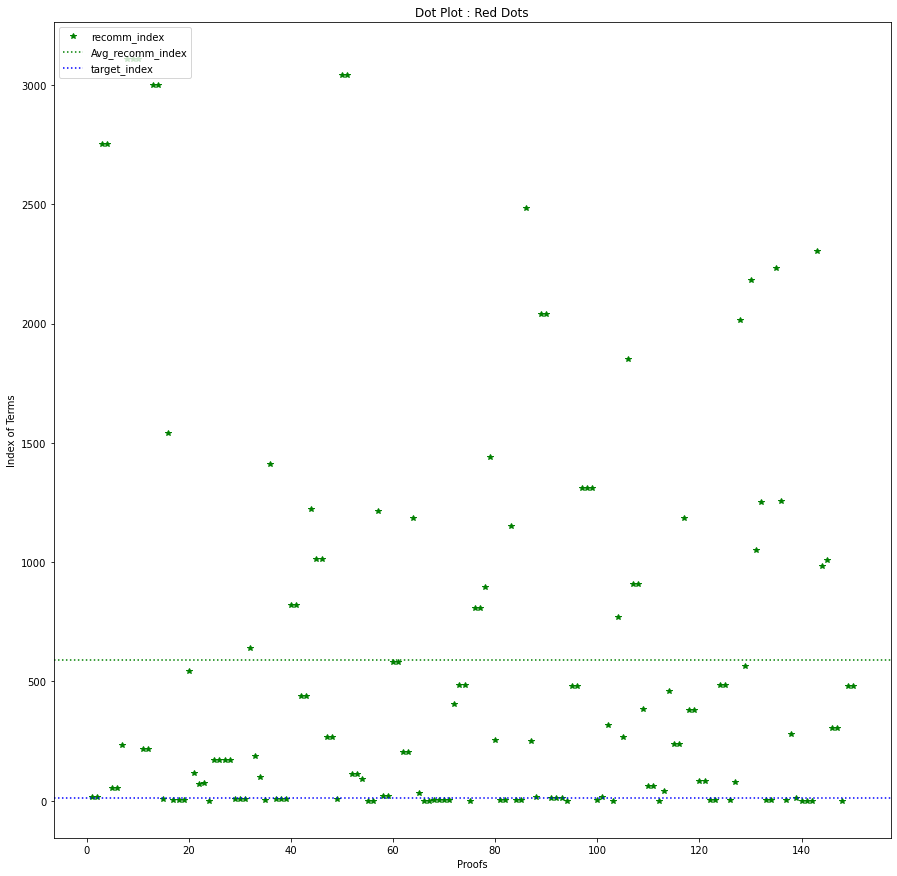

In [13]:
scores = get_score(test)[1]
test_no = list(range(1,len(scores)+1))

plt.figure(figsize=[15,15])

plt.plot(test_no, scores, 'g*', label="recomm_index")
plt.axhline(y = mean(scores), color = 'g', ls = 'dotted', label="Avg_recomm_index")

#plt.axhline(y = len(data['terms'])/2, color = 'r', ls = 'dotted')

plt.axhline(y = 12, color = 'b', ls = 'dotted', label="target_index")

plt.legend(loc="upper left")

plt.xlabel('Proofs')
plt.ylabel('Index of Terms')

plt.title('Dot Plot : Red Dots')